In [31]:
from google.colab import files
import os

uploaded = files.upload()

for filename in uploaded.keys():
  print(f'Uploaded file: {filename}')
  # Optionally, move the file to a specific directory if needed
  # For this specific case, we can assume it's uploaded to the current working directory

# Verify if 'dados_clientes.csv' was uploaded
if 'dados_clientes.csv' in uploaded:
  print("✅ 'dados_clientes.csv' uploaded successfully. You can now run the next cells.")
else:
  print("❌ 'dados_clientes.csv' was not found among the uploaded files. Please ensure you select the correct file.")

Saving dados_clientes.csv to dados_clientes (1).csv
Uploaded file: dados_clientes (1).csv
❌ 'dados_clientes.csv' was not found among the uploaded files. Please ensure you select the correct file.


In [32]:
# ========================================
# 1: Importação de Bibliotecas
# ========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore')

print("✅ Bibliotecas importadas com sucesso!")

✅ Bibliotecas importadas com sucesso!


In [33]:
# ========================================
# 2: Carregamento dos Dados
# ========================================

# Carregar o dataset
df = pd.read_csv('dados_clientes.csv')

print("="*60)
print("DATASET CARREGADO COM SUCESSO")
print("="*60)
print(f"\n📊 Dimensões: {df.shape[0]} linhas x {df.shape[1]} colunas\n")

DATASET CARREGADO COM SUCESSO

📊 Dimensões: 30 linhas x 9 colunas



In [34]:
# ========================================
# 3: Informações Básicas
# ========================================

print("="*60)
print("PRIMEIRAS 5 LINHAS")
print("="*60)
print(df.head())

print("\n" + "="*60)
print("INFORMAÇÕES GERAIS DO DATASET")
print("="*60)
print(df.info())

print("\n" + "="*60)
print("ESTATÍSTICAS DESCRITIVAS")
print("="*60)
print(df.describe())

print("\n" + "="*60)
print("TIPOS DE DADOS")
print("="*60)
print(df.dtypes)

PRIMEIRAS 5 LINHAS
   id_cliente             nome  idade     genero    renda_anual  \
0        1006   Gabriela Rocha   40.0  Masculino  750000.000000   
1        1019  Isabela Martins   42.0      Outro  174931.504986   
2        1014   Gabriela Rocha   33.0      Outro  180660.619728   
3        1010   Sabrina Torres   58.0   Feminino   95133.980567   
4        1007     Daniel Costa   42.0      Outro   96879.401953   

  categoria_produto  valor_compra data_compra        regiao  
0       Eletrônicos   1084.904523  2024-01-15  Centro-Oeste  
1              Casa    984.100186  2024-04-05         Norte  
2              Moda   2017.981504  2024/03/10         Norte  
3           Esporte   4981.455814  2024/03/10      Nordeste  
4            Beleza   2052.315229  2024-06-22  Centro-Oeste  

INFORMAÇÕES GERAIS DO DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             -

In [35]:
# ========================================
# 4: Análise de Valores Ausentes
# ========================================

print("="*60)
print("ANÁLISE DE VALORES AUSENTES")
print("="*60)

missing = df.isnull().sum()
missing_pct = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Coluna': missing.index,
    'Valores Nulos': missing.values,
    'Percentual (%)': missing_pct.values
})
missing_df = missing_df[missing_df['Valores Nulos'] > 0].sort_values('Valores Nulos', ascending=False)

if len(missing_df) > 0:
    print("\n⚠️ Colunas com valores ausentes:\n")
    print(missing_df.to_string(index=False))
else:
    print("\n✅ Nenhum valor ausente encontrado!")

ANÁLISE DE VALORES AUSENTES

⚠️ Colunas com valores ausentes:

      Coluna  Valores Nulos  Percentual (%)
 data_compra              4       13.333333
       idade              2        6.666667
valor_compra              2        6.666667
 renda_anual              1        3.333333


In [36]:
# ========================================
# 5: Tratamento de Valores Ausentes
# ========================================

print("="*60)
print("TRATAMENTO DE VALORES AUSENTES")
print("="*60)

# Criar cópia para tratamento
df_tratado = df.copy()

# Tratar valores ausentes em idade (preencher com mediana)
if df_tratado['idade'].isnull().sum() > 0:
    mediana_idade = df_tratado['idade'].median()
    df_tratado['idade'].fillna(mediana_idade, inplace=True)
    print(f"✅ Idade: preenchida com mediana ({mediana_idade:.0f})")

# Tratar valores ausentes em renda_anual (preencher com mediana por região)
if df_tratado['renda_anual'].isnull().sum() > 0:
    df_tratado['renda_anual'] = df_tratado.groupby('regiao')['renda_anual'].transform(
        lambda x: x.fillna(x.median())
    )
    print("✅ Renda anual: preenchida com mediana por região")

# Tratar valores ausentes em valor_compra (preencher com mediana por categoria de produto)
if df_tratado['valor_compra'].isna().sum() > 0:
    df_tratado['valor_compra'] = df_tratado.groupby('categoria_produto')['valor_compra'].transform(
        lambda x: x.fillna(x.median())
    )
    print("✅ Valor compra: preenchido com mediana por categoria_produto")

# Tratar valores ausentes em data_compra (Preencher com moda)
# Converter para datetime
df_tratado['data_compra'] = pd.to_datetime(df_tratado['data_compra'], errors='coerce')

# Calcular moda automaticamente e preencher nulos
if df_tratado['data_compra'].isna().sum() > 0:
    moda_data = df_tratado['data_compra'].mode()
    data_preenchimento = moda_data[0] if len(moda_data) > 0 else df_tratado['data_compra'].median()
    df_tratado['data_compra'].fillna(data_preenchimento, inplace=True)
    print(f"✅ Data compra: preenchida com moda ({data_preenchimento.strftime('%Y-%m-%d')})")

print(f"\n📊 Shape após tratamento: {df_tratado.shape}")

TRATAMENTO DE VALORES AUSENTES
✅ Idade: preenchida com mediana (40)
✅ Renda anual: preenchida com mediana por região
✅ Valor compra: preenchido com mediana por categoria_produto
✅ Data compra: preenchida com moda (2024-06-22)

📊 Shape após tratamento: (30, 9)


In [37]:
# ========================================
# 6: Detecção e Tratamento de Duplicatas
# ========================================

print("="*60)
print("ANÁLISE DE DUPLICATAS")
print("="*60)

duplicatas_total = df_tratado.duplicated().sum()
print(f"\n🔍 Total de linhas duplicadas: {duplicatas_total}")

if duplicatas_total > 0:
    # Identificar duplicatas mantendo a primeira ocorrência
    df_tratado = df_tratado.drop_duplicates(keep='first')
    print(f"✅ {duplicatas_total} duplicatas removidas")
    print(f"\n📊 Shape após remoção de duplicatas: {df_tratado.shape}")
else:
    print("✅ Nenhuma duplicata encontrada!")



ANÁLISE DE DUPLICATAS

🔍 Total de linhas duplicadas: 0
✅ Nenhuma duplicata encontrada!


In [38]:
# ========================================
# 7: Conversão de Tipos de Dados
# ========================================

print("="*60)
print("PADRONIZAÇÃO DE TIPOS DE DADOS")
print("="*60)

# Padronizar formatos de data
df_tratado['data_compra'] = pd.to_datetime(df_tratado['data_compra'], format='mixed', errors='coerce')

# Remover linhas onde data não pôde ser convertida
linhas_antes = len(df_tratado)
df_tratado = df_tratado.dropna(subset=['data_compra'])
linhas_removidas = linhas_antes - len(df_tratado)

if linhas_removidas > 0:
    print(f"⚠️ {linhas_removidas} linhas removidas por data inválida")

# Garantir tipos corretos
df_tratado['idade'] = df_tratado['idade'].astype(int)
df_tratado['renda_anual'] = df_tratado['renda_anual'].astype(float)
df_tratado['valor_compra'] = df_tratado['valor_compra'].astype(float)

print("\n✅ Tipos de dados padronizados:")
print(df_tratado.dtypes)

PADRONIZAÇÃO DE TIPOS DE DADOS

✅ Tipos de dados padronizados:
id_cliente                    int64
nome                         object
idade                         int64
genero                       object
renda_anual                 float64
categoria_produto            object
valor_compra                float64
data_compra          datetime64[ns]
regiao                       object
dtype: object


ANÁLISE DE OUTLIERS


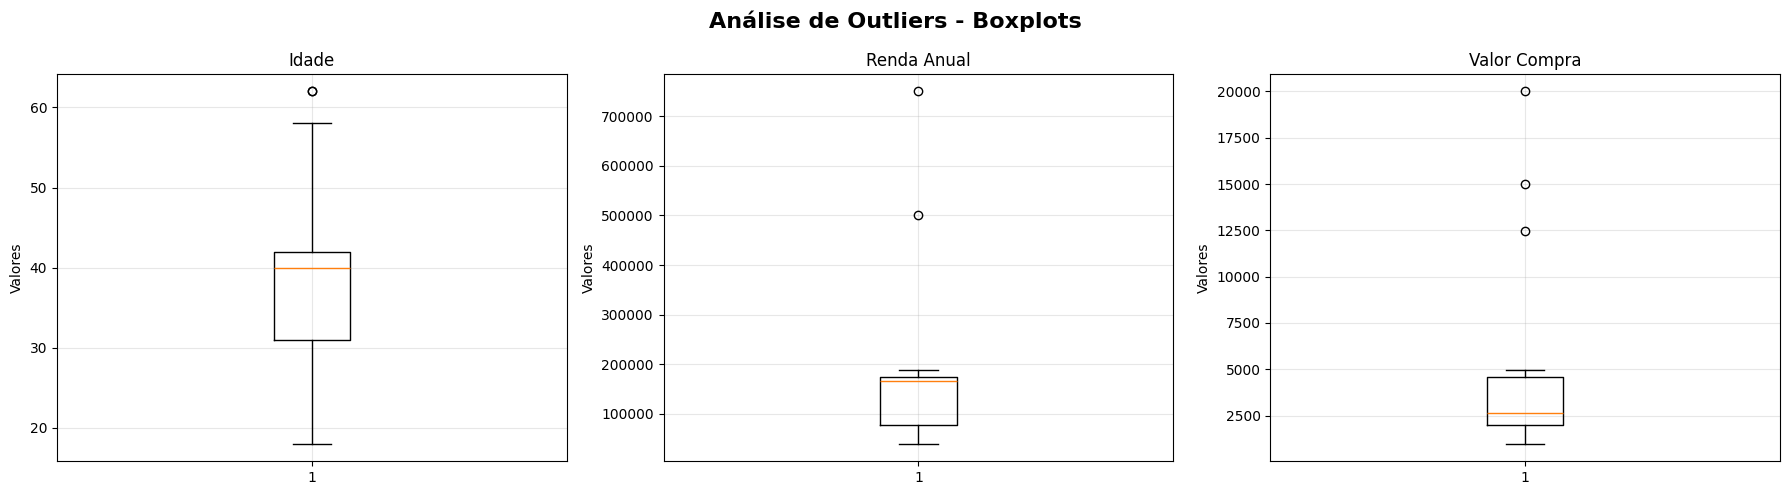


📊 Estatísticas de outliers (método IQR):

idade:
  Limite inferior: 14.50
  Limite superior: 58.50
  Outliers: 2 (6.67%)

renda_anual:
  Limite inferior: -68438.06
  Limite superior: 320953.25
  Outliers: 2 (6.67%)

valor_compra:
  Limite inferior: -1857.14
  Limite superior: 8476.51
  Outliers: 3 (10.00%)



In [39]:
# ========================================
# 8: Análise de Outliers (Boxplot)
# ========================================

print("="*60)
print("ANÁLISE DE OUTLIERS")
print("="*60)

# Colunas numéricas para análise
colunas_numericas = ['idade', 'renda_anual', 'valor_compra']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Análise de Outliers - Boxplots', fontsize=16, fontweight='bold')

for idx, col in enumerate(colunas_numericas):
    axes[idx].boxplot(df_tratado[col].dropna(), vert=True)
    axes[idx].set_title(col.replace('_', ' ').title())
    axes[idx].set_ylabel('Valores')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 Estatísticas de outliers (método IQR):\n")
for col in colunas_numericas:
    Q1 = df_tratado[col].quantile(0.25)
    Q3 = df_tratado[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_tratado[(df_tratado[col] < lower_bound) | (df_tratado[col] > upper_bound)]
    pct_outliers = (len(outliers) / len(df_tratado)) * 100

    print(f"{col}:")
    print(f"  Limite inferior: {lower_bound:.2f}")
    print(f"  Limite superior: {upper_bound:.2f}")
    print(f"  Outliers: {len(outliers)} ({pct_outliers:.2f}%)\n")

In [40]:
# ========================================
# 9: Tratamento Contextual de Outliers
# ========================================

print("="*60)
print("TRATAMENTO CONTEXTUAL DE OUTLIERS")
print("="*60)

# ============================================
# PARTE 1: Outliers em valor_compra (por categoria)
# ============================================
print("\n🛒 Tratando outliers de VALOR_COMPRA por categoria:")

def tratar_outliers_por_categoria(df, coluna_valor, coluna_grupo, metodo='cap'):
    """
    Trata outliers considerando o contexto do grupo (categoria)
    """
    df_tratado = df.copy()

    for grupo in df_tratado[coluna_grupo].unique():
        mask_grupo = df_tratado[coluna_grupo] == grupo
        valores = df_tratado.loc[mask_grupo, coluna_valor]

        Q1 = valores.quantile(0.25)
        Q3 = valores.quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        if metodo == 'cap':
            df_tratado.loc[mask_grupo, coluna_valor] = df_tratado.loc[mask_grupo, coluna_valor].clip(lower=lower, upper=upper)

        outliers_antes = ((valores < lower) | (valores > upper)).sum()
        if outliers_antes > 0:
            print(f"  ✅ {grupo}: {outliers_antes} outliers tratados (limite: R$ {upper:.2f})")

    return df_tratado

# Aplicar tratamento por categoria
df_tratado = tratar_outliers_por_categoria(df_tratado, 'valor_compra', 'categoria_produto', metodo='cap')

# ============================================
# PARTE 2: Validação por renda_anual
# ============================================
print("\n💰 Validando compras em relação à RENDA_ANUAL:")

# Criar proporção compra/renda
df_tratado['proporcao_compra_renda'] = (df_tratado['valor_compra'] / df_tratado['renda_anual']) * 100

# Identificar casos suspeitos (compra > 15% da renda anual)
limiar_suspeito = 15  # %
casos_suspeitos = df_tratado[df_tratado['proporcao_compra_renda'] > limiar_suspeito]

print(f"  ⚠️ Encontrados {len(casos_suspeitos)} casos onde compra > {limiar_suspeito}% da renda")

if len(casos_suspeitos) > 0:
    # Ajustar valores suspeitos para o limiar
    for idx in casos_suspeitos.index:
        valor_max_aceitavel = df_tratado.loc[idx, 'renda_anual'] * (limiar_suspeito / 100)
        if df_tratado.loc[idx, 'valor_compra'] > valor_max_aceitavel:
            df_tratado.loc[idx, 'valor_compra'] = valor_max_aceitavel

    print(f"  ✅ Valores ajustados para máximo de {limiar_suspeito}% da renda anual")

# ============================================
# PARTE 3: Renda_anual - Apenas erros claros
# ============================================
print("\n💵 Analisando RENDA_ANUAL - apenas erros evidentes:")

# Definir limites de erro claro
salario_minimo_anual = 14000  # ~R$ 1.200/mês

erros_baixos = df_tratado[df_tratado['renda_anual'] < salario_minimo_anual]

print(f"  Rendas < R$ {salario_minimo_anual:,} (suspeitas): {len(erros_baixos)}")

# Tratar apenas erros claros
if len(erros_baixos) > 0:
    # Substituir por mediana da região
    for idx in erros_baixos.index:
        regiao = df_tratado.loc[idx, 'regiao']
        mediana_regiao = df_tratado[df_tratado['regiao'] == regiao]['renda_anual'].median()
        df_tratado.loc[idx, 'renda_anual'] = mediana_regiao
    print(f"  ✅ Rendas baixas ajustadas para mediana regional")

print(f"\n📊 Shape após tratamento contextual: {df_tratado.shape}")
print("✅ Outliers tratados com critérios específicos por contexto!")

TRATAMENTO CONTEXTUAL DE OUTLIERS

🛒 Tratando outliers de VALOR_COMPRA por categoria:
  ✅ Casa: 1 outliers tratados (limite: R$ 6793.60)

💰 Validando compras em relação à RENDA_ANUAL:
  ⚠️ Encontrados 1 casos onde compra > 15% da renda
  ✅ Valores ajustados para máximo de 15% da renda anual

💵 Analisando RENDA_ANUAL - apenas erros evidentes:
  Rendas < R$ 14,000 (suspeitas): 0

📊 Shape após tratamento contextual: (30, 10)
✅ Outliers tratados com critérios específicos por contexto!


In [41]:
# ========================================
# 10: Feature Engineering com Datas
# ========================================

print("="*60)
print("ENGENHARIA DE VARIÁVEIS TEMPORAIS")
print("="*60)

# Extrair componentes de data
df_tratado['ano_compra'] = df_tratado['data_compra'].dt.year
df_tratado['mes_compra'] = df_tratado['data_compra'].dt.month
df_tratado['dia_semana'] = df_tratado['data_compra'].dt.dayofweek
df_tratado['trimestre'] = df_tratado['data_compra'].dt.quarter
df_tratado['nome_dia_semana'] = df_tratado['data_compra'].dt.day_name()
df_tratado['nome_mes'] = df_tratado['data_compra'].dt.month_name()

print("✅ Variáveis temporais criadas:")
print("  - ano_compra")
print("  - mes_compra")
print("  - dia_semana")
print("  - trimestre")
print("  - nome_dia_semana")
print("  - nome_mes")

print("\n📊 Exemplo das novas colunas:")
print(df_tratado[['data_compra', 'ano_compra', 'mes_compra', 'nome_dia_semana']].head())

ENGENHARIA DE VARIÁVEIS TEMPORAIS
✅ Variáveis temporais criadas:
  - ano_compra
  - mes_compra
  - dia_semana
  - trimestre
  - nome_dia_semana
  - nome_mes

📊 Exemplo das novas colunas:
  data_compra  ano_compra  mes_compra nome_dia_semana
0  2024-01-15        2024           1          Monday
1  2024-04-05        2024           4          Friday
2  2024-06-22        2024           6        Saturday
3  2024-06-22        2024           6        Saturday
4  2024-06-22        2024           6        Saturday


In [42]:
# ========================================
# 11: Encoding de Variáveis Categóricas
# ========================================

print("="*60)
print("ENCODING DE VARIÁVEIS CATEGÓRICAS")
print("="*60)

# Label Encoding para variáveis ordinais/binárias
le_genero = LabelEncoder()
df_tratado['genero_encoded'] = le_genero.fit_transform(df_tratado['genero'])
print(f"✅ Gênero: {dict(enumerate(le_genero.classes_))}")

le_regiao = LabelEncoder()
df_tratado['regiao_encoded'] = le_regiao.fit_transform(df_tratado['regiao'])
print(f"✅ Região: {dict(enumerate(le_regiao.classes_))}")

# One-Hot Encoding para categoria_produto
df_onehot = pd.get_dummies(df_tratado['categoria_produto'], prefix='categoria')
df_tratado = pd.concat([df_tratado, df_onehot], axis=1)
print(f"✅ Categoria produto: {len(df_onehot.columns)} colunas criadas")

print(f"\n📊 Shape após encoding: {df_tratado.shape}")

ENCODING DE VARIÁVEIS CATEGÓRICAS
✅ Gênero: {0: 'Feminino', 1: 'Masculino', 2: 'Outro'}
✅ Região: {0: 'Centro-Oeste', 1: 'Nordeste', 2: 'Norte', 3: 'Sudeste', 4: 'Sul'}
✅ Categoria produto: 5 colunas criadas

📊 Shape após encoding: (30, 23)


In [43]:
# ========================================
# 12: Normalização de Variáveis Numéricas
# ========================================

print("="*60)
print("NORMALIZAÇÃO DE VARIÁVEIS NUMÉRICAS")
print("="*60)

# Selecionar colunas para normalização
colunas_normalizar = ['idade', 'renda_anual', 'valor_compra']

# Aplicar StandardScaler
scaler = StandardScaler()

# Obter os dados normalizados
scaled_data = scaler.fit_transform(df_tratado[colunas_normalizar])

# Criar os nomes das novas colunas
new_column_names = [f'{col}_normalizado' for col in colunas_normalizar]

# Criar um DataFrame temporário com os dados normalizados e os nomes das novas colunas
# Em seguida, atribuir isso ao DataFrame principal
scaled_df = pd.DataFrame(scaled_data, columns=new_column_names, index=df_tratado.index)
df_tratado = pd.concat([df_tratado, scaled_df], axis=1)

print("✅ Variáveis normalizadas (StandardScaler):")
for col in colunas_normalizar:
    print(f"  - {col} → {col}_normalizado")

print("\n📊 Estatísticas após normalização:")
print(df_tratado[[f'{col}_normalizado' for col in colunas_normalizar]].describe())

NORMALIZAÇÃO DE VARIÁVEIS NUMÉRICAS
✅ Variáveis normalizadas (StandardScaler):
  - idade → idade_normalizado
  - renda_anual → renda_anual_normalizado
  - valor_compra → valor_compra_normalizado

📊 Estatísticas após normalização:
       idade_normalizado  renda_anual_normalizado  valor_compra_normalizado
count       3.000000e+01             3.000000e+01              3.000000e+01
mean       -1.822616e-16             5.921189e-17             -1.646831e-16
std         1.017095e+00             1.017095e+00              1.017095e+00
min        -1.758871e+00            -8.571431e-01             -8.534654e-01
25%        -6.683151e-01            -5.826254e-01             -5.382704e-01
50%         8.668523e-02             5.512115e-02             -3.483903e-01
75%         2.544631e-01             1.248312e-01              2.493235e-01
max         1.932242e+00             4.304031e+00              3.965266e+00


VISUALIZAÇÕES DOS DADOS TRATADOS


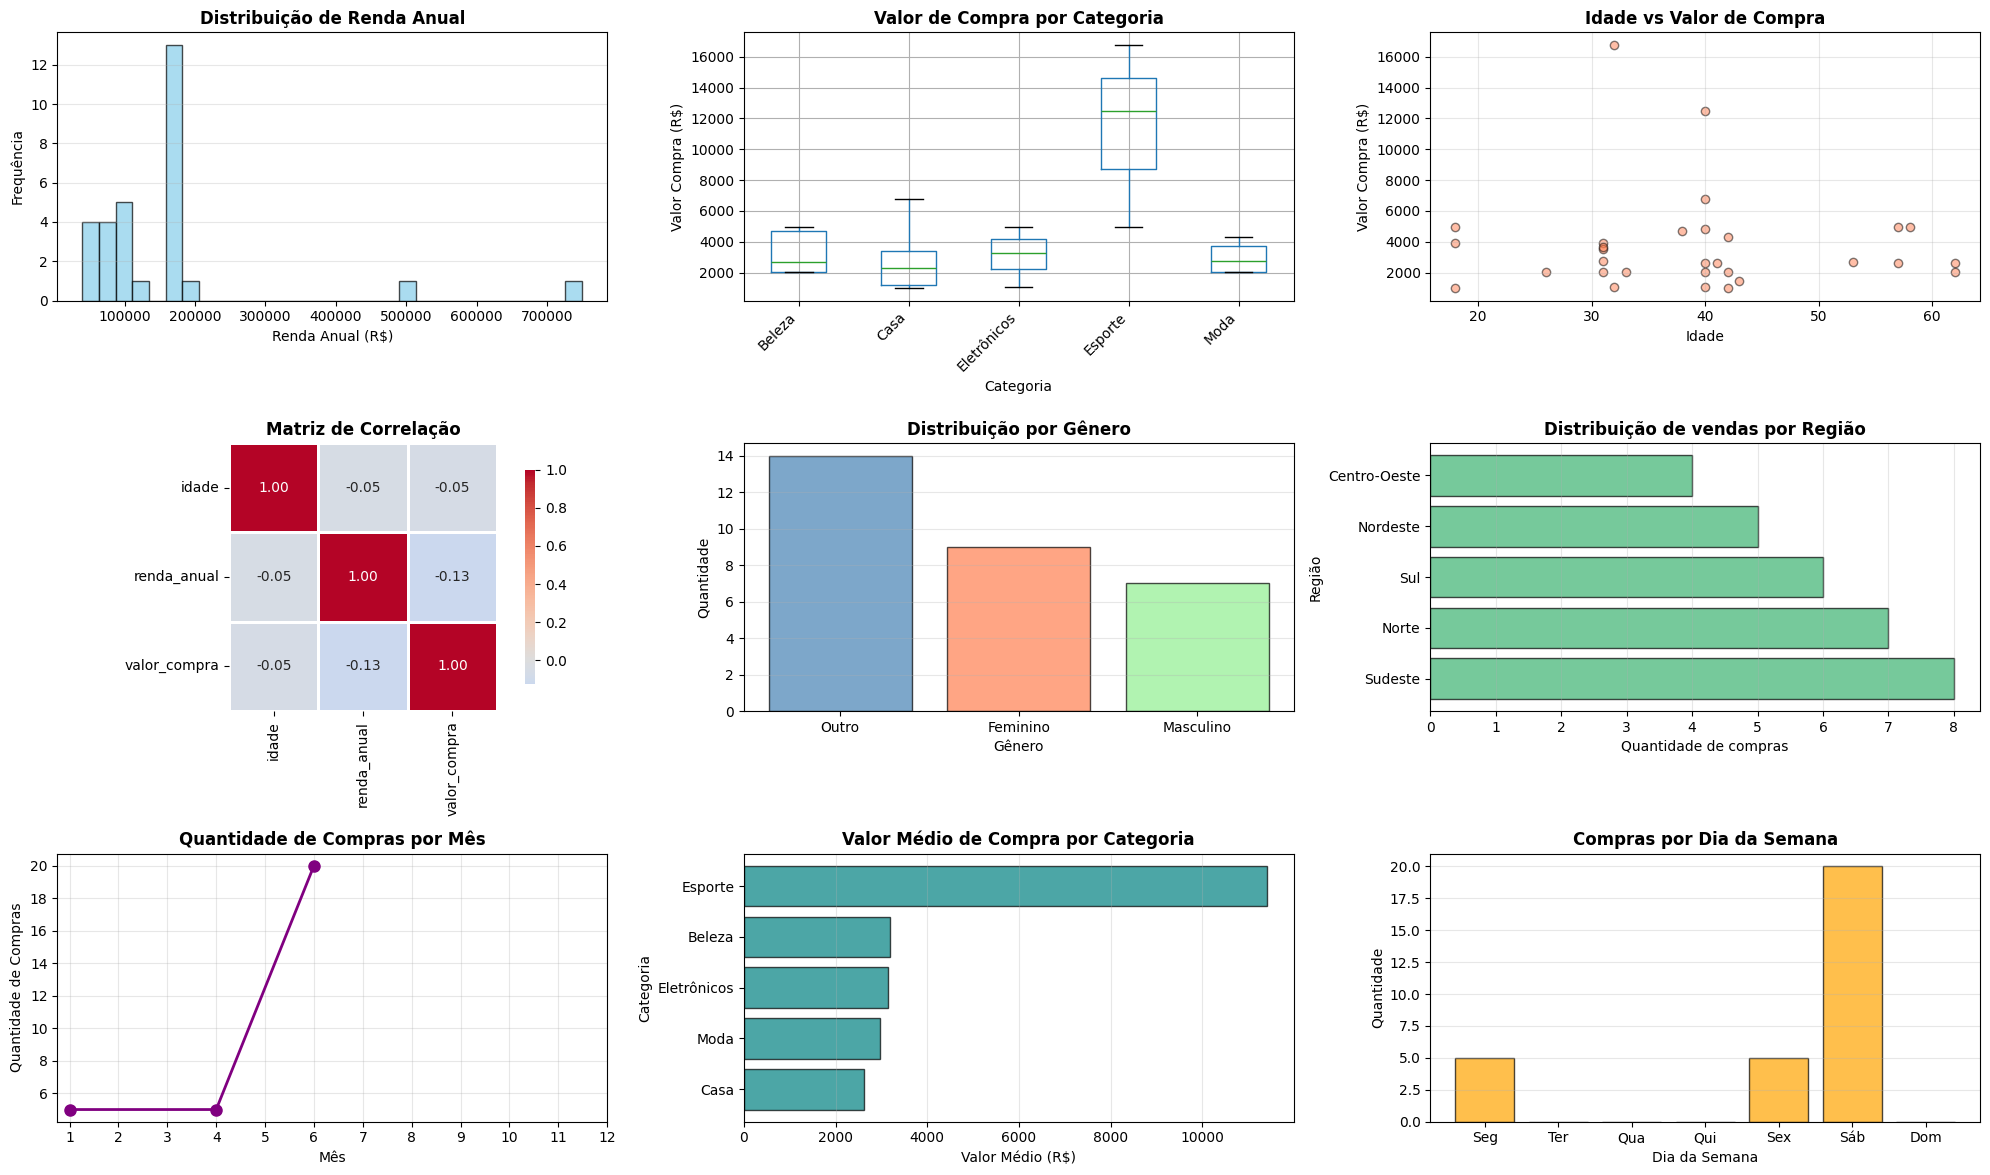


✅ Visualizações geradas com sucesso!


In [44]:
# ========================================
# 13: Visualizações Finais
# ========================================

print("="*60)
print("VISUALIZAÇÕES DOS DADOS TRATADOS")
print("="*60)

# Configurar estilo dos gráficos
plt.style.use('default')
fig = plt.figure(figsize=(20, 12))

# 1. Histograma de Renda Anual
plt.subplot(3, 3, 1)
plt.hist(df_tratado['renda_anual'], bins=30, edgecolor='black', color='skyblue', alpha=0.7)
plt.title('Distribuição de Renda Anual', fontsize=12, fontweight='bold')
plt.xlabel('Renda Anual (R$)')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.3)

# 2. Boxplot de Gasto por Categoria
plt.subplot(3, 3, 2)
df_tratado.boxplot(column='valor_compra', by='categoria_produto', ax=plt.gca())
plt.title('Valor de Compra por Categoria', fontsize=12, fontweight='bold')
plt.suptitle('')
plt.xlabel('Categoria')
plt.ylabel('Valor Compra (R$)')
plt.xticks(rotation=45, ha='right')

# 3. Scatterplot Idade vs Valor Gasto
plt.subplot(3, 3, 3)
plt.scatter(df_tratado['idade'], df_tratado['valor_compra'], alpha=0.5, color='coral', edgecolors='black')
plt.title('Idade vs Valor de Compra', fontsize=12, fontweight='bold')
plt.xlabel('Idade')
plt.ylabel('Valor Compra (R$)')
plt.grid(alpha=0.3)

# 4. Heatmap de Correlação
plt.subplot(3, 3, 4)
colunas_numericas = ['idade', 'renda_anual', 'valor_compra']
corr_matrix = df_tratado[colunas_numericas].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlação', fontsize=12, fontweight='bold')

# 5. Distribuição por Gênero
plt.subplot(3, 3, 5)
genero_counts = df_tratado['genero'].value_counts()
plt.bar(genero_counts.index, genero_counts.values, color=['steelblue', 'coral', 'lightgreen'],
        edgecolor='black', alpha=0.7)
plt.title('Distribuição por Gênero', fontsize=12, fontweight='bold')
plt.xlabel('Gênero')
plt.ylabel('Quantidade')
plt.grid(axis='y', alpha=0.3)

# 6. Distribuição por Região
plt.subplot(3, 3, 6)
regiao_counts = df_tratado['regiao'].value_counts()
plt.barh(regiao_counts.index, regiao_counts.values, color='mediumseagreen',
         edgecolor='black', alpha=0.7)
plt.title('Distribuição de vendas por Região', fontsize=12, fontweight='bold')
plt.xlabel('Quantidade de compras')
plt.ylabel('Região')
plt.grid(axis='x', alpha=0.3)

# 7. Compras por Mês
plt.subplot(3, 3, 7)
compras_mes = df_tratado['mes_compra'].value_counts().sort_index()
plt.plot(compras_mes.index, compras_mes.values, marker='o', linewidth=2,
         markersize=8, color='purple')
plt.title('Quantidade de Compras por Mês', fontsize=12, fontweight='bold')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Compras')
plt.xticks(range(1, 13))
plt.grid(alpha=0.3)

# 8. Média de Valor de Compra por Categoria
plt.subplot(3, 3, 8)
media_categoria = df_tratado.groupby('categoria_produto')['valor_compra'].mean().sort_values()
plt.barh(media_categoria.index, media_categoria.values, color='teal',
         edgecolor='black', alpha=0.7)
plt.title('Valor Médio de Compra por Categoria', fontsize=12, fontweight='bold')
plt.xlabel('Valor Médio (R$)')
plt.ylabel('Categoria')
plt.grid(axis='x', alpha=0.3)

# 9. Compras por Dia da Semana
plt.subplot(3, 3, 9)
compras_dia = df_tratado['nome_dia_semana'].value_counts()
ordem_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
compras_dia = compras_dia.reindex(ordem_dias, fill_value=0)
plt.bar(range(len(compras_dia)), compras_dia.values, color='orange',
        edgecolor='black', alpha=0.7)
plt.title('Compras por Dia da Semana', fontsize=12, fontweight='bold')
plt.xlabel('Dia da Semana')
plt.ylabel('Quantidade')
plt.xticks(range(len(compras_dia)), ['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb', 'Dom'])
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Visualizações geradas com sucesso!")